In [1]:
import elevation
from osgeo import gdal
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Loading the SRTM raster data that covers HOT OSM Task #5678

SRTM = Shuttle Radar Topography Mission  
https://en.wikipedia.org/wiki/Shuttle_Radar_Topography_Mission  
https://www2.jpl.nasa.gov/srtm/

HOT OSM Task #5678 coordinates inferred using google maps  
https://tasks.hotosm.org/project/5678#bottom

In [2]:
# specify the bounding box for the target area
URb_bounds = (104.917171, 16.330147, 105.805508, 15.294198)

In [3]:
# set some variables for the SRTM dataset
cache_dir='./data/elevation'
product='SRTM3'
output='URb_%s_full.tif' % product;

In [4]:
# load in the data
elevation.seed(bounds=URb_bounds, cache_dir=cache_dir, product=product, max_download_tiles=999)

'./data/elevation/SRTM3'

In [5]:
# build a vrt file for faster loading
!gdalbuildvrt ./data/elevation/SRTM3/cache/srtm.vrt ./data/elevation/SRTM3/cache/*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


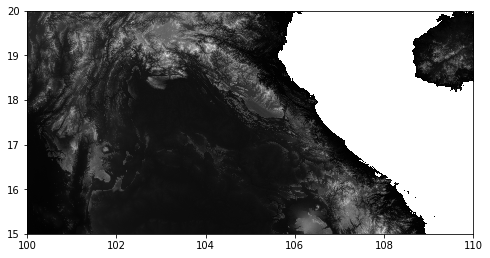

In [6]:
# open using rasterio and plot
srtm_vrt = rasterio.open('./data/elevation/SRTM3/cache/srtm.vrt')
f,ax = plt.subplots(figsize=(8,10))
show(srtm_vrt, ax=ax,cmap='gray')

Note that this extent is greater than the bounds specified above. Instead of throwing an error, the elevation API was smart enough to grab the minimum set of tiles that cover the target area. 

In [7]:
# subset to target area
ds = gdal.Open('./data/elevation/SRTM3/cache/srtm.vrt')
ds = gdal.Translate('./data/elevation/SRTM3/cache/srtm_URb_subset.vrt', ds, projWin = [104.917171, 16.330147, 105.805508, 15.294198])
ds = None

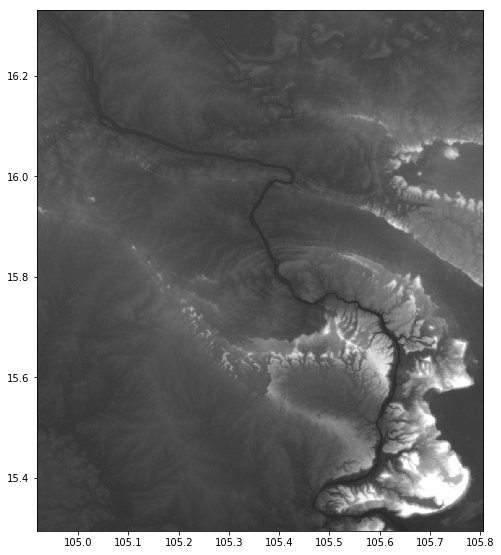

In [8]:
# plot target area
srtm_URb_subset_vrt = rasterio.open('./data/elevation/SRTM3/cache/srtm_URb_subset.vrt')
f,ax = plt.subplots(figsize=(8,10))
show(srtm_URb_subset_vrt, ax=ax,cmap='gray',vmin=10,vmax=500)